In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, plot_confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline


# Loading the dataset

In [2]:
dataset = sns.load_dataset("iris")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**variety column is the dependent variable that we will classify using the necessary data.**

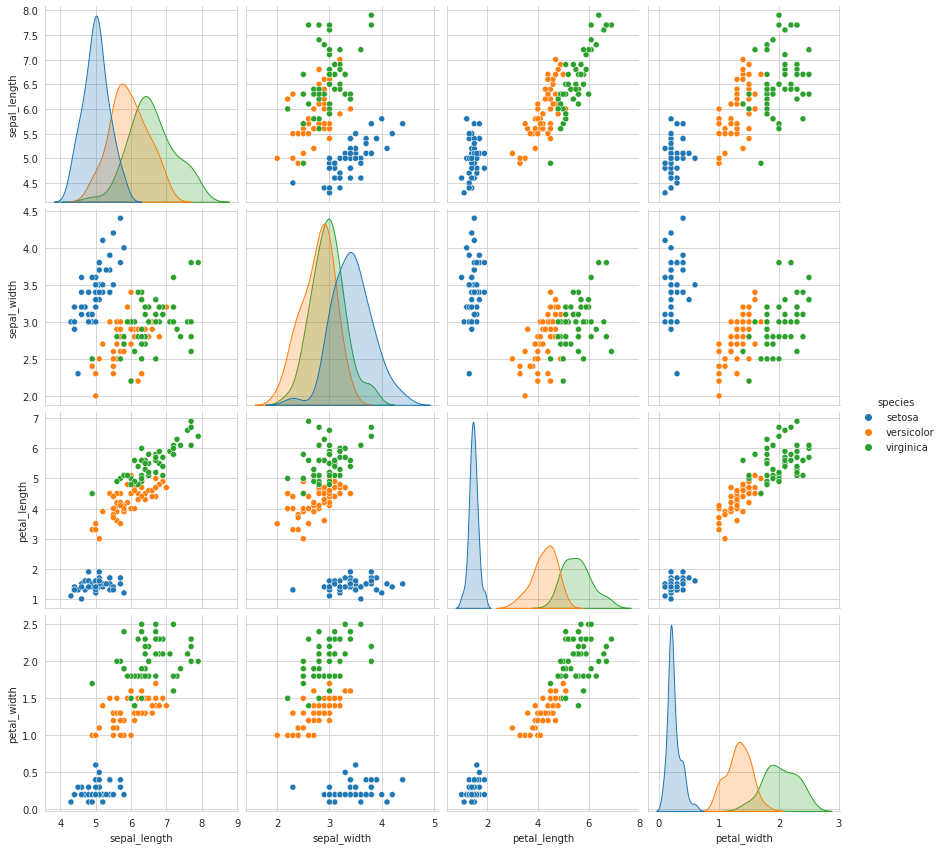

In [4]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="species", size=3);
plt.show()

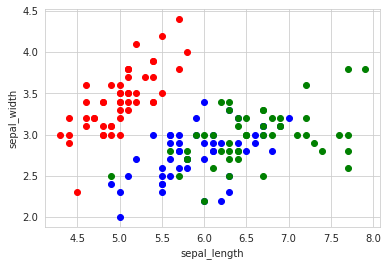

In [5]:
for n in range(0,150):
    if dataset['species'][n] == 'setosa':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'red')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'versicolor':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'blue')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'virginica':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'green')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

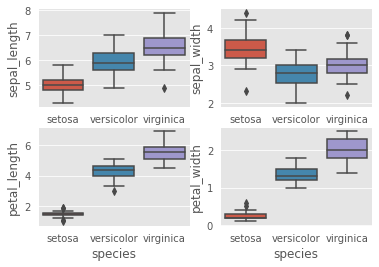

In [6]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'species', y = 'petal_length', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'species', y = 'petal_width', data = dataset)

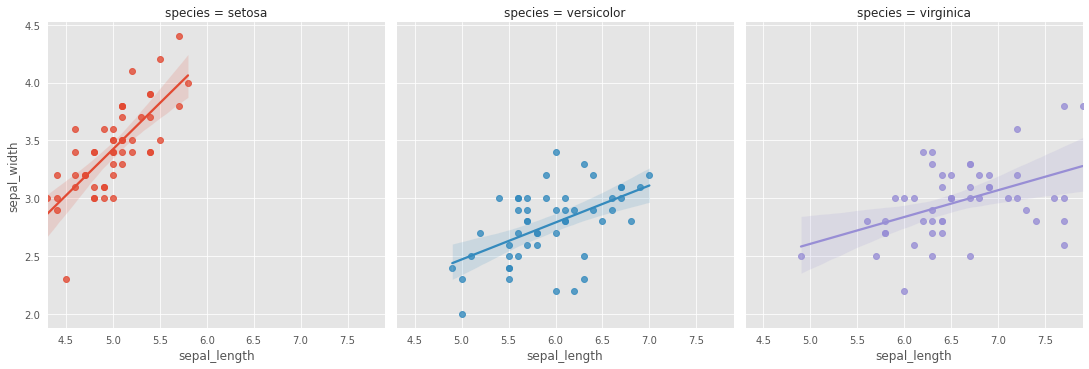

In [7]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = dataset, hue = 'species', col = 'species')

# Preprocessing

**slicing the dataset**

In [8]:
X = dataset.iloc[:,:4].values
y = dataset.iloc[:,4:5].values

**We divide our data set into train and test to verify if our model is working correctly.**


In [9]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


# Model Comparision

LogisticRegression got 98.0% Accuracy.
SVC got 96.0% Accuracy.
GaussianNaiveBayes got 94.0% Accuracy.
Bernoulli got 70.0% Accuracy.
KneighborsClassifier got 96.0% Accuracy.
DecisionTree got 98.0% Accuracy.
RandomForest got 98.0% Accuracy.
AdaBoostClassifier got 92.0% Accuracy.
[13:07:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier got 98.0% Accuracy.


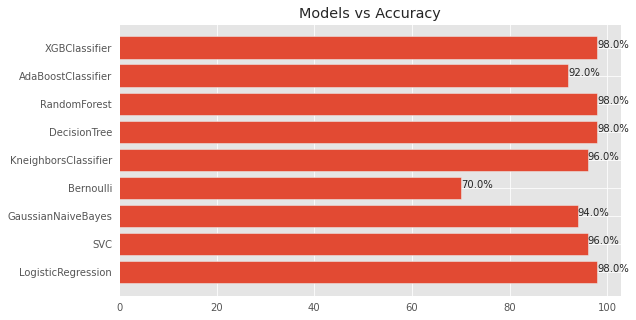

In [11]:
all_models = {'LogisticRegression':LogisticRegression(random_state = 0), 
              'SVC':SVC(), 
              'GaussianNaiveBayes':GaussianNB(), 
              'Bernoulli':BernoulliNB(), 
              'KneighborsClassifier':KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski'), 
              'DecisionTree':DecisionTreeClassifier(random_state = 0), 
              'RandomForest':RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
              'AdaBoostClassifier':AdaBoostClassifier(n_estimators = 50),
              'XGBClassifier': XGBClassifier(n_estimators = 100),
         }
model_names = []
model_scores = []

for model_name in all_models:
    pipeline = make_pipeline(StandardScaler(), all_models[model_name])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_names.append(model_name)
    model_scores.append(accuracy * 100)
    print(f"{model_name} got {str(accuracy*100)[:5]}% Accuracy.")

plt.figure(figsize = (9,5))
plt.barh(model_names, model_scores)
  
for index, value in enumerate(model_scores):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Models vs Accuracy")
plt.show()

# Modelling

**A small function for easier and easier use of the model. It can make your work quite easy when using more than one model.**

In [12]:

def model_evaluate(model, test):
    y_pred = model.predict(test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    categories = ['Setosa', 'Versicolor', 'Virginica']
    
    sns.heatmap(cm, cmap = 'Blues', fmt = '', annot = True,
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Logistic Regression

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



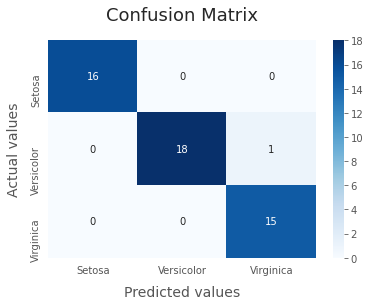

In [13]:

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Support Vector Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



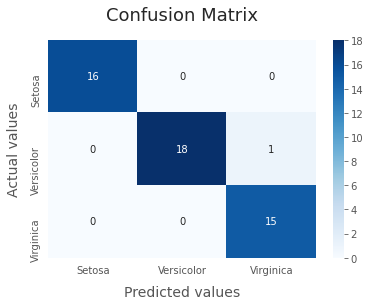

In [14]:
model = SVC(kernel = 'linear') #kernel = poly, rbf, precomputed
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Naive Bayes
**Gaussian Naive Bayes**

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.89      0.92        19
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



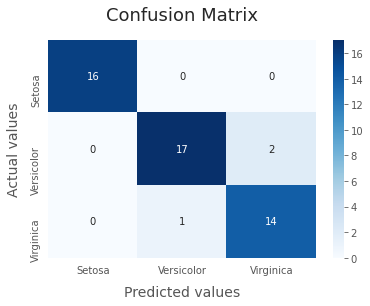

In [15]:

model = GaussianNB()
model.fit(X_train, y_train)

model_evaluate(model, X_test)

**Bernoulli Naive Bayes**

              precision    recall  f1-score   support

      setosa       0.89      1.00      0.94        16
  versicolor       0.83      0.26      0.40        19
   virginica       0.54      0.93      0.68        15

    accuracy                           0.70        50
   macro avg       0.75      0.73      0.67        50
weighted avg       0.76      0.70      0.66        50



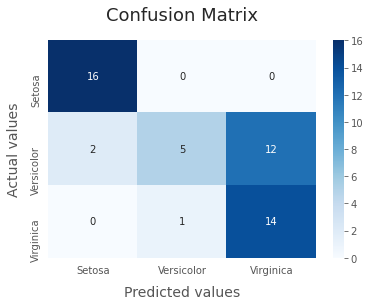

In [16]:
model = BernoulliNB()
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# KNeighbors Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



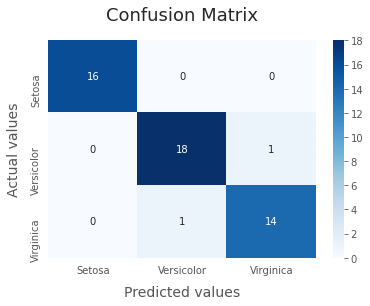

In [17]:
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Decision Tree Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



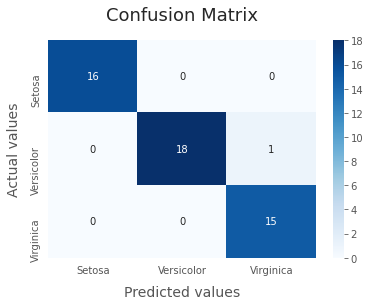

In [18]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# Random Forest Classifier

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



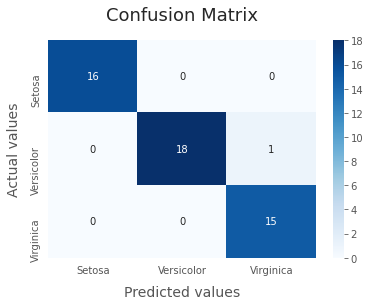

In [19]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

model_evaluate(model, X_test)

# AdaBoost

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



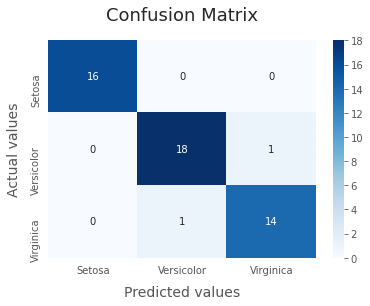

In [20]:
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

model_evaluate(model, X_test)

## XGBClassifier

**if xgboost is not installed**

!pip install xgboost

[13:07:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



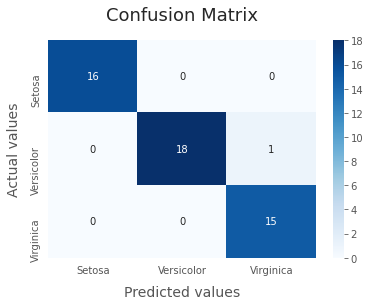

In [21]:
model = XGBClassifier(n_estimators = 100)
model.fit(X_train, y_train)

model_evaluate(model, X_test)